Make simple 2-axis plot and test linearity of stage position values vs **real** vlaues

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Sample data
#x = [10000,20000,30000,40000,100000,150000,200000,500000,1000000,1500000]
x = [0,2,4,6,8,10]
#y = [0.2894, 0.5788,0.8682,1.1576, 2.8939, 4.3409,5.7879, 14.4697,28.9394,43.4091]
y = [0,2.888,7.72,12.56,17.40,22.24]


# Plotting the first set of data
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

Fit a function, in this case check the values above for linearity

In [ ]:
def fit_lin(x,a,b):
    return a*x+b

popt, _ = curve_fit(fit_lin, x,y)
a = popt[0]
b = popt[1]
a_inv = 1/a
print(1/a)
print(1/b)
print(f"a: {popt[0]}  b: {popt[1]}")
print(x/a_inv)
print(y)


How to write to a list lol

In [ ]:
import time
duration = []
for i in range(10):
    start_time = i+45
    duration.append([i, start_time])
    time.sleep(1)
    print(time.time())

print(duration)

How to read in the textfile, access 1st, 2nd 3rd elements and convert to array

In [ ]:
from datetime import datetime
import ast 

positions_file = open("test_file.txt", "r")
data = ast.literal_eval(positions_file.read())
print(data)
first_elements = [sublist[0] for sublist in data]
print(first_elements)

print(datetime.now())


How to use real timing

In [40]:
from datetime import datetime
import time

list =[]
now = datetime.now()
time.sleep(1)
later = datetime.now()

for i in range(10):
    list.append([i,datetime.now()])
    time.sleep(0.5*i+0.2)

with open("xx.txt", "w") as output:
    output.write(str(list))


This is how real timing can be read out of .txt file <br>
And how to print with timing


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


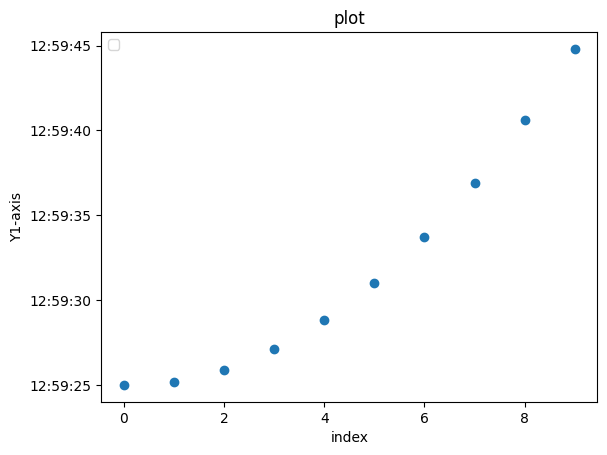

In [56]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open("xx.txt", "r") as positions_file:
    data = positions_file.read()

# Replace "datetime.datetime" with "datetime" in the string representation
data = data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta")
data = eval(data)

# col0 = [sublist[0] for sublist in data]
# print(col0)       # access column
# print(col0[0])    # acces element of column

# col1 = [sublist[1] for sublist in data]
# print(col1)       # access column
# print(col1[0])    # acces element of column

index = [sublist[0] for sublist in data]            # index doesnt make much sense in this context
timing = [sublist[1] for sublist in data]

# Plotting the first set of data
plt.scatter(index, timing)
plt.xlabel('index')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

Plot position when triggered over time, test whether the is exactly x seconds difference (whilst trigger with Arduino is set in a constant manner) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.1573, 2.228124, 3.396229, 4.468057, 5.540277, 6.610896, 7.779423, 8.851125, 9.922029, 11.090979, 12.162378, 13.234296, 14.305649, 15.474416, 16.545188, 17.616725, 18.783959, 19.856544, 20.927445, 21.999628, 23.167735, 25.357894, 26.430031, 27.502442, 28.670302, 29.740449, 30.811211, 31.886323, 33.051974, 34.125825, 35.195775, 36.363947, 37.434627, 38.508037, 39.594673, 40.682299, 41.849294, 44.041231, 45.112202, 46.184922, 47.35324, 49.543611, 50.616038, 51.687131, 52.854199, 53.926711, 54.997804, 56.071091, 57.238603, 58.310403, 59.381428, 60.549503, 61.621715, 62.69268, 63.764157, 64.93176, 66.004272, 67.075819, 68.243826, 69.315542, 70.387188, 72.572216, 73.746956, 74.818256, 75.889586, 76.961344, 78.129226, 79.200457, 80.269902, 81.440147, 82.512346, 83.583126, 84.65484, 85.822737, 86.895252, 87.966622, 89.133386, 90.205836, 91.277617, 92.349318, 93.517107, 94.588173]
[0.01322530375825581, 1.0895971811861913, 3.7735524804327487, 6.3463515614397865, 8.918137763603195, 11.48925835

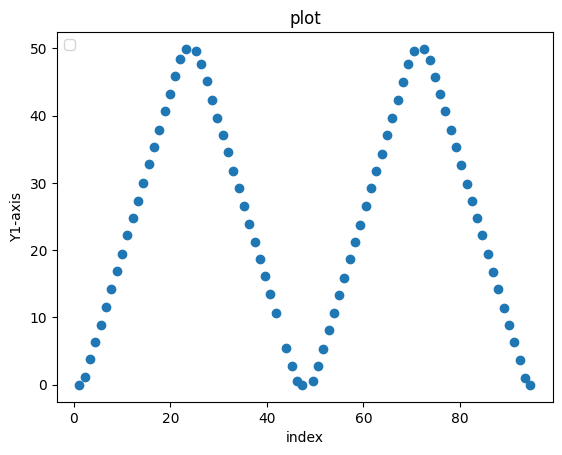

In [88]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open("test_file.txt", "r") as positions_file:
    data = positions_file.read()

# Replace "datetime.datetime" with "datetime" in the string representation
data = eval(data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))

timing = [sublist[0].total_seconds() for sublist in data]            # index doesnt make much sense in this context
position = [sublist[2] for sublist in data]

print(timing)
print(position)

# Plotting the first set of data
plt.scatter(timing, position)
plt.xlabel('index')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

How many events were actually 1s


In [1]:
print(timing)
print(len(timing))

diff_timing = [None for _ in range(len(timing)-1)]
x = [None for _ in range(len(timing)-1)]

for i in range(len(timing)-1):
    diff_timing[i] = timing[i+1]-timing[i]
    x[i] = i
print(diff_timing)
plt.scatter(x, diff_timing)
plt.ylim(0,6)
plt.show()

NameError: name 'timing' is not defined

Prepare data from Arduino and Stage to be read out and plotted
This is for one long array

In [93]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

arg = "ccc"

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

# convert stage data 
stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))
print(len(stage_data))

timing = [sublist[0].total_seconds() for sublist in stage_data]            # index doesnt make much sense in this context
position_fw = [sublist[1] for sublist in stage_data]
position_bw = [sublist[2] for sublist in stage_data]

# Safely evaluate the string as a Python expression
arduino_data = ast.literal_eval(arduino_data)
x = [None for _ in range(len(arduino_data))]
print(len(arduino_data))

# Convert strings to integers
ard_data_int = [[int(value) for value in sublist] for sublist in arduino_data]
reed_f0 = [sublist[0] for sublist in ard_data_int]
reed_f1 = [sublist[1] for sublist in ard_data_int]
reed_b0 = [sublist[2] for sublist in ard_data_int]
reed_b1 = [sublist[3] for sublist in ard_data_int]
reed_b2 = [sublist[4] for sublist in ard_data_int]




439
439


Plot all Reed Movable Back 

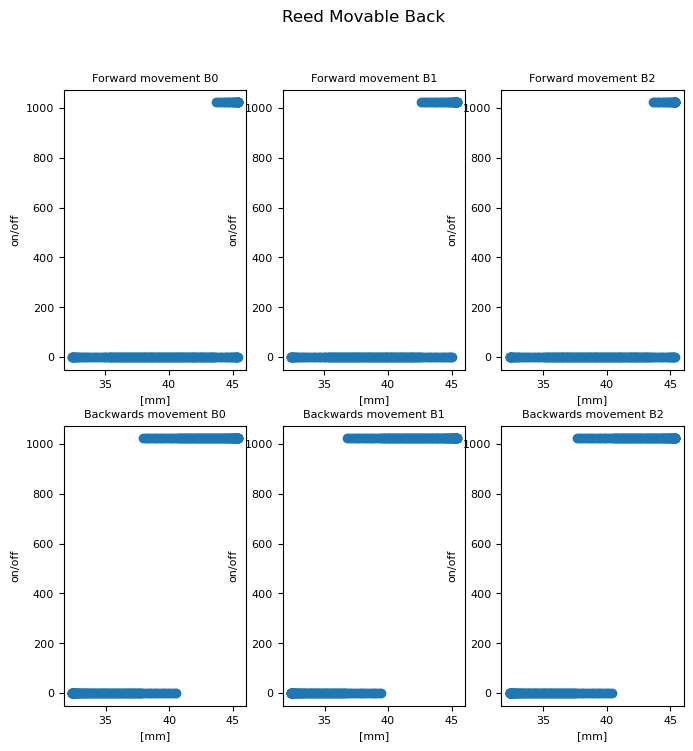

In [96]:
import matplotlib

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

fig, ax = plt.subplots(2, 3, figsize=(8, 8))
matplotlib.rc('axes', labelsize=SMALL_SIZE) 
matplotlib.rc('ytick', labelsize=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=SMALL_SIZE)

#fig.constrained_layout()

fig.suptitle('Reed Movable Back')
ax[0,0].scatter(position_fw,reed_b0[0:len(position_fw)])
ax[0,0].set_title('Forward movement B0', size=SMALL_SIZE)
ax[0,1].scatter(position_fw,reed_b1[0:len(position_fw)])
ax[0,1].set_title('Forward movement B1', size=SMALL_SIZE)
ax[0,2].scatter(position_fw,reed_b2[0:len(position_fw)])
ax[0,2].set_title('Forward movement B2', size=SMALL_SIZE)
ax[1,0].scatter(position_bw,reed_b0[0:len(position_bw)])
ax[1,0].set_title('Backwards movement B0', size=SMALL_SIZE)
ax[1,1].scatter(position_bw,reed_b1[0:len(position_bw)])
ax[1,1].set_title('Backwards movement B1', size=SMALL_SIZE)
ax[1,2].scatter(position_bw,reed_b2[0:len(position_bw)])
ax[1,2].set_title('Backwards movement B2', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='on/off')


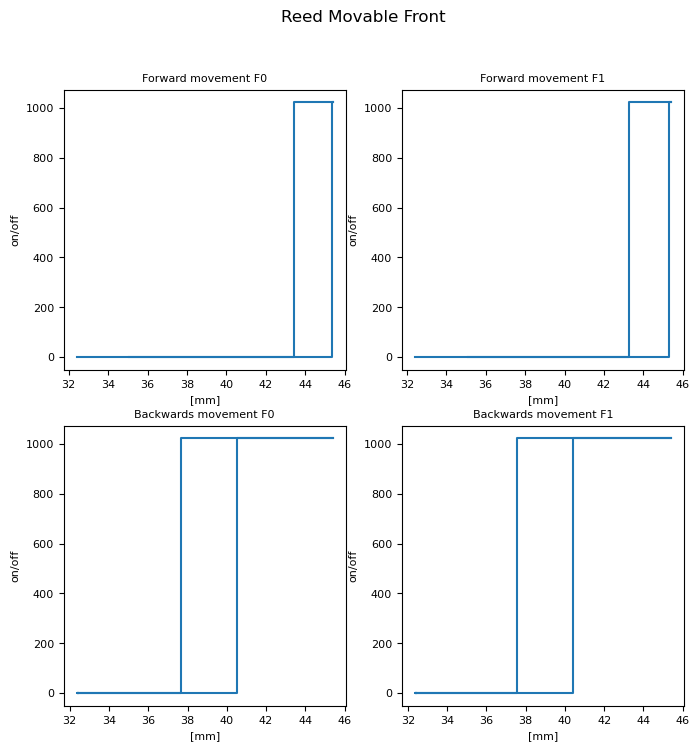

In [95]:
import matplotlib

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
matplotlib.rc('axes', labelsize=SMALL_SIZE) 
matplotlib.rc('ytick', labelsize=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=SMALL_SIZE)

#fig.constrained_layout()

fig.suptitle('Reed Movable Front')
ax[0,0].step(position_fw,reed_f0[0:len(position_fw)])
ax[0,0].set_title('Forward movement F0', size=SMALL_SIZE)
ax[0,1].step(position_fw,reed_f1[0:len(position_fw)])
ax[0,1].set_title('Forward movement F1', size=SMALL_SIZE)
ax[1,0].step(position_bw,reed_f0[0:len(position_bw)])
ax[1,0].set_title('Backwards movement F0', size=SMALL_SIZE)
ax[1,1].step(position_bw,reed_f1[0:len(position_bw)])
ax[1,1].set_title('Backwards movement F1', size=SMALL_SIZE)


for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='on/off')

Wie bestimme ich am besten die Range in der das ganze auslöst?

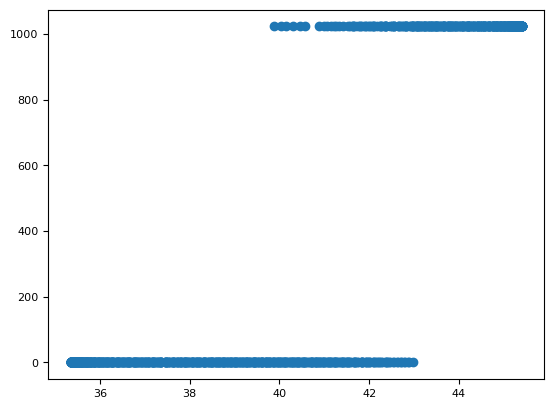

In [73]:
import matplotlib.pyplot as plt

plt.scatter(position_bw, reed_b2[0:len(position_bw)])
plt.show()

This is for the case, when the data for each back and forth is stored in different arrays

Die erste Runde braucht aus irgendeinem Grund 2mm bis die weter gespeichert werden, aber die könnte sonst auch einfach weg. Jetzt erstmal so machen, dass jede Runde als einzelne Linie in einem Plot gezeigt wird

In [12]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

arg = "0110"

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

# convert stage data 
stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))

round1_stage = stage_data[0]
round2_stage = stage_data[1]

position_fw_r1 = [sublist[0] for sublist in round1_stage]
position_bw_r1 = [sublist[1] for sublist in round1_stage]

position_fw_r2 = [sublist[0] for sublist in round2_stage]
position_bw_r2 = [sublist[1] for sublist in round2_stage]

# timing = [sublist[0].total_seconds() for sublist in stage_data]            # index doesnt make much sense in this context
# position_fw = [sublist[1] for sublist in stage_data]
# position_bw = [sublist[2] for sublist in stage_data]

# convert arduino data 
arduino_data = ast.literal_eval(arduino_data)

# Convert strings to integers
arduino_data = [[[int(v) for v in value] for value in sublist] for sublist in arduino_data]

# hard gecodet  
round1_ard = arduino_data[0]
round2_ard = arduino_data[1]

# Round 1
reed_f0_r1 = [sublist[0] for sublist in arduino_data[0]]
reed_f1_r1 = [sublist[1] for sublist in arduino_data[0]]
reed_b0_r1 = [sublist[2] for sublist in arduino_data[0]]
reed_b1_r1 = [sublist[3] for sublist in arduino_data[0]]
reed_b2_r1 = [sublist[4] for sublist in arduino_data[0]]

# Round 2
reed_f0_r2 = [sublist[0] for sublist in round2_ard]
reed_f1_r2 = [sublist[1] for sublist in round2_ard]
reed_b0_r2 = [sublist[2] for sublist in round2_ard]
reed_b1_r2 = [sublist[3] for sublist in round2_ard]
reed_b2_r2 = [sublist[4] for sublist in round2_ard]


ValueError: invalid literal for int() with base 10: ''

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[32.40112602586076, 32.410299814244496, 32.42827117887005, 32.44647405865986, 32.479117

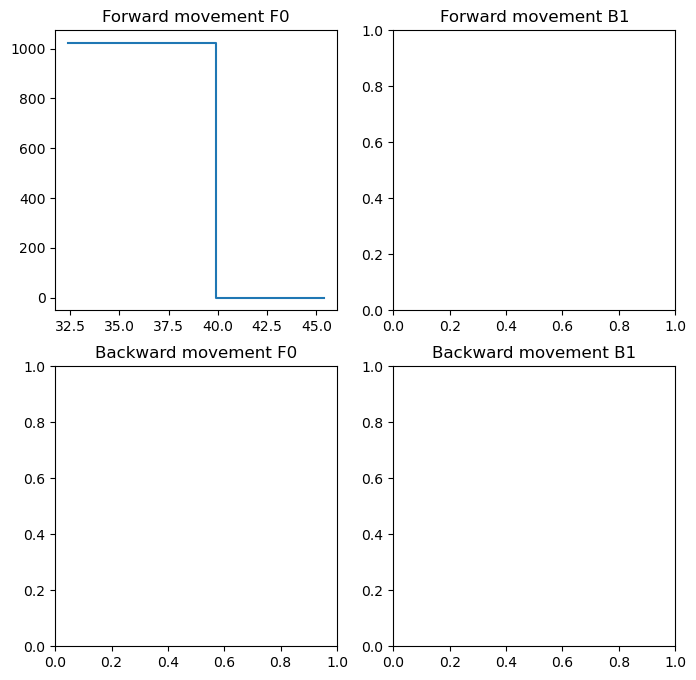

In [87]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

arg = "0110"
rounds = 5

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))
stage_data = stage_data[1:len(stage_data)]                  # shorten data because of errorous first round 

round1_stage = stage_data[0]
round2_stage = stage_data[1]
position_fw_r1 = [sublist[0] for sublist in round1_stage]
position_bw_r1 = [sublist[1] for sublist in round1_stage]
position_fw_r2 = [sublist[0] for sublist in round2_stage]
position_bw_r2 = [sublist[1] for sublist in round2_stage]

arduino_data = ast.literal_eval(arduino_data)
arduino_data = arduino_data[1:len(arduino_data)]            # shorten data because of errorous first round 
arduino_data = [[[int(v) for v in value] for value in sublist] for sublist in arduino_data]     # convert to int

round1_ard = arduino_data[0]
round2_ard = arduino_data[1]
reed_f0_r1 = [sublist[0] for sublist in round1_ard]
reed_f1_r1 = [sublist[1] for sublist in round1_ard]
reed_b0_r1 = [sublist[2] for sublist in round1_ard]
reed_b1_r1 = [sublist[3] for sublist in round1_ard]
reed_b2_r1 = [sublist[4] for sublist in round1_ard]
reed_f0_r2 = [sublist[0] for sublist in round2_ard]
reed_f1_r2 = [sublist[1] for sublist in round2_ard]
reed_b0_r2 = [sublist[2] for sublist in round2_ard]
reed_b1_r2 = [sublist[3] for sublist in round2_ard]
reed_b2_r2 = [sublist[4] for sublist in round2_ard]

print(reed_f0_r1)
print(position_fw_r1)
print(len(reed_f0_r1))
print(len(position_fw_r1))

### See values together
# temp_pos = position_bw_r1
# temp_reed = reed_b2_r1

# temp = []
# for i in range(233):
#     temp.append([temp_pos[i], temp_reed[i]])
# print(temp)

fig, ax = plt.subplots(2,2, figsize=(8, 8))

 # [f0, f1, b0, b1, b2], [fw, bw, other]
for i in range(rounds-1):
    # alle fw rounds von f0
    ax[0,0].step([sublist[0] for sublist in stage_data[i]], [sublist[0] for sublist in arduino_data[i]])
    # alle bw rounds von f0 
    ax[1,0].step([sublist[1] for sublist in stage_data[i]], [sublist[0] for sublist in arduino_data[i]]) 
     # alle fw rounds von b1
    ax[0,1].step([sublist[0] for sublist in stage_data[i]], [sublist[3] for sublist in arduino_data[i]])
    # alle bw rounds von b1 
    ax[1,1].step([sublist[1] for sublist in stage_data[i]], [sublist[3] for sublist in arduino_data[i]])

#ax[0,0].step([sublist[0] for sublist in stage_data[0]], [sublist[0] for sublist in arduino_data[0]])
#ax[0,0].step([sublist[0] for sublist in stage_data[1]], [sublist[0] for sublist in arduino_data[1]])
#ax[0,0].step([sublist[0] for sublist in stage_data[2]], [sublist[0] for sublist in arduino_data[2]])
#ax[0,0].step([sublist[0] for sublist in stage_data[3]], [sublist[0] for sublist in arduino_data[3]])

ax[0,0].set_title('Forward movement F0')
ax[1,0].set_title('Backward movement F0')
ax[0,1].set_title('Forward movement B1')
ax[1,1].set_title('Backward movement B1')
plt.show()    



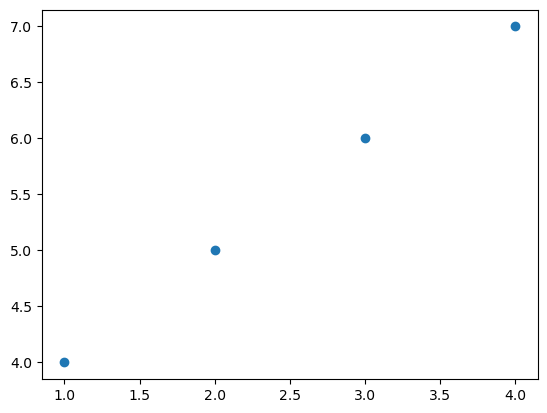

In [35]:
import matplotlib.pyplot as plt

# plt.step(position_fw_r1, reed_b2_r1)
# plt.step(position_fw_r1, reed_b1_r1)
# plt.step(position_fw_r1, reed_b0_r1)

# plt.step(position_bw_r1, reed_b2_r1)
# plt.step(position_bw_r1, reed_b1_r1)
# plt.step(position_bw_r1, reed_b0_r1)
#######
# plt.step(position_fw_r1, reed_f0_r1)
# plt.step(position_fw_r1, reed_f1_r1)

# plt.step(position_bw_r1, reed_f0_r1)
# plt.step(position_bw_r1, reed_f1_r1)
#######
# plt.step(position_fw_r1, reed_f0_r1)
# plt.step(position_fw_r1, reed_f1_r1)

# DIE BEIDEN SIND LEER!!!
# plt.step(position_fw_r2, reed_f0_r2)
# plt.step(position_fw_r2, reed_f1_r2)

plt.show()

Check, if arduino_data is complete !!

In [22]:
elements_with_less_than_5 = []
arduino_data = arduino_data[1:len(arduino_data)]

for i, sublist in enumerate(arduino_data):
    for j, subsublist in enumerate(sublist):
        if len(subsublist) != 5:
            elements_with_less_than_5.append((i, j))

print("Elements with less than 5 elements in their sublists:")
for element in elements_with_less_than_5:
    print(element)

Elements with less than 5 elements in their sublists:
